In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np


In [2]:
# import the data

data_path = "Mouse_metadata.csv"
results_path = "Study_results.csv"

In [3]:
# read the data

mouse_data = pd.read_csv(data_path)
study_results = pd.read_csv(results_path)

In [4]:
# combine the two data sets into one using the Mouse ID

combined = pd.merge(mouse_data, study_results, on = "Mouse ID", how = "outer")
combined


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# count the mice

num = pd.DataFrame({"Number of Mice" : [combined['Mouse ID'].nunique()]})
num.set_index('Number of Mice', inplace=True)

num

""
Number of Mice
249


In [6]:
# check the data for any mouse ID with duplicate time points

dups = combined.loc[combined.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

dups

array(['g989'], dtype=object)

In [7]:
# look at duplicate mouse data

dup_data = combined.loc[combined['Mouse ID'] == 'g989']

dup_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# remove duplicate mouse data

clean = combined[~combined['Mouse ID'].isin(['g989'])].reset_index(drop = True)

clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# recount the mice

num = pd.DataFrame({"Number of Mice" : [clean['Mouse ID'].nunique()]})
num.set_index('Number of Mice', inplace=True)

num

""
Number of Mice
248


In [10]:
# generate a summary statistics table 
# mean, median, variance, standard deviation, SEM

tv = clean.groupby('Drug Regimen')['Tumor Volume (mm3)']

tumor_table = pd.DataFrame({
    'Mean' : tv.mean(),
    'Median' : tv.median(),
    'Variance' : tv.var(),
    'Standard Deviation' : tv.std(),
    'SEM' : tv.sem()
})

tumor_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# summary stats with aggregation

clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)']\
    .agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<AxesSubplot:xlabel='Drug Regimen', ylabel='Measurements Taken'>

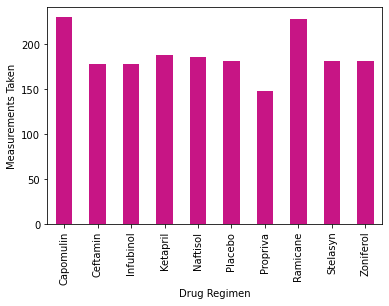

In [12]:
# bar graph one way

bg1 = tv.count().plot(kind = 'bar', color = "mediumvioletred")
bg1.set_ylabel('Measurements Taken')
bg1

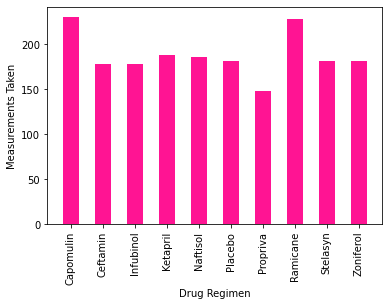

In [14]:
# bar graph two way

x_axis = np.arange(len(tumor_table))
drugs = clean['Drug Regimen'].unique()
drugs = np.sort(drugs)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation = 'vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Measurements Taken')

bg2 = plt.bar(x_axis, tv.count(), color = 'deeppink' , width = .5)

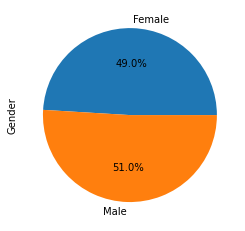

In [85]:
# pie chart one way
gender = clean.groupby('Sex').count()
gender = gender[['Mouse ID']]
gender.rename(columns = {'Mouse ID' : 'Gender'}, inplace = True)
gender

pc1 = gender.plot.pie(y = 'Gender', autopct = '%1.1f%%').get_legend().remove()
pc1


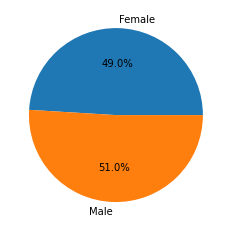

In [84]:
# pie chart two way
sexdf = clean.groupby('Sex', as_index = False).count()
sexnum = sexdf[['Mouse ID']].rename(columns = {'Mouse ID' : 'Gender'})
sn = sexnum['Gender']
sex = sexdf['Sex']

plt.pie(sn, labels = sex, autopct = '%1.1f%%')

plt.show()

In [77]:
# get the last timepoint for each mouse

ltp = combined[combined['Timepoint'].eq(45)]
ltp

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [80]:
# merge with the original dataframe to get last timepoint tumor volume

ltp_df = combined.merge(ltp)
ltp_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
125,y769,Ceftamin,Female,6,27,45,68.594745,4
126,y865,Ceftamin,Male,23,26,45,64.729837,3
127,z581,Infubinol,Female,24,25,45,62.754451,3
128,z795,Naftisol,Female,13,29,45,65.741070,3


In [97]:
# filter to get only the drug regimens we want:
# Capomulin, Ramicane, Infubinol, and Ceftamin

dr = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

drug_df = ltp_df[ltp_df['Drug Regimen'].isin(dr)]
drug_df = drug_df[['Drug Regimen', 'Tumor Volume (mm3)']]
drug_df

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,22.050126
1,Capomulin,23.343598
2,Capomulin,28.484033
3,Capomulin,28.430964
4,Ramicane,29.128472
...,...,...
121,Ceftamin,61.386660
122,Infubinol,67.685569
125,Ceftamin,68.594745
126,Ceftamin,64.729837


In [112]:
capo = drug_df[drug_df['Drug Regimen'] == 'Capomulin']
catumvol = capo['Tumor Volume (mm3)']
quartiles = catumvol.quantile([.25, .5, .75])
q1 = quartiles[.25]
q3 = quartiles[.75]
iqr = q3 - q1
lowb = q1 - (iqr * 1.5)
upb = q3 + (iqr * 1.5)
print(lowb)
print(upb)
print(max(capo['Tumor Volume (mm3)']))
print(min(capo['Tumor Volume (mm3)']))

20.70456164999999
51.83201549
47.68596303
23.34359787


In [113]:
rami = drug_df[drug_df['Drug Regimen'] == 'Ramicane']
rtumvol = rami['Tumor Volume (mm3)']
quartiles = rtumvol.quantile([.25, .5, .75])
q1 = quartiles[.25]
q3 = quartiles[.75]
iqr = q3 - q1
lowb = q1 - (iqr * 1.5)
upb = q3 + (iqr * 1.5)
print(lowb)
print(upb)
print(max(rami['Tumor Volume (mm3)']))
print(min(rami['Tumor Volume (mm3)']))

19.690480101250003
49.79900043124999
45.22086888
22.05012627


In [114]:
infu = drug_df[drug_df['Drug Regimen'] == 'Infubinol']
itumvol = infu['Tumor Volume (mm3)']
quartiles = itumvol.quantile([.25, .5, .75])
q1 = quartiles[.25]
q3 = quartiles[.75]
iqr = q3 - q1
lowb = q1 - (iqr * 1.5)
upb = q3 + (iqr * 1.5)
print(lowb)
print(upb)
print(max(infu['Tumor Volume (mm3)']))
print(min(infu['Tumor Volume (mm3)']))

55.35777559500001
75.08224443499999
72.2267309
60.91876652


In [115]:
ceft = drug_df[drug_df['Drug Regimen'] == 'Ceftamin']
cetumvol = ceft['Tumor Volume (mm3)']
quartiles = cetumvol.quantile([.25, .5, .75])
q1 = quartiles[.25]
q3 = quartiles[.75]
iqr = q3 - q1
lowb = q1 - (iqr * 1.5)
upb = q3 + (iqr * 1.5)
print(lowb)
print(upb)
print(max(ceft['Tumor Volume (mm3)']))
print(min(ceft['Tumor Volume (mm3)']))

52.29350701999999
76.66786758
68.92318457
59.74190064


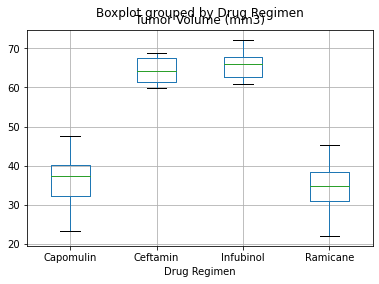

In [121]:
boxplot = drug_df.boxplot(column = ['Tumor Volume (mm3)'], \
                          by = 'Drug Regimen')